<a href="https://colab.research.google.com/github/carvalheiracarlos/deep_leaning_notebooks/blob/main/mnist_FeedFoward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Descrição da Tarefa



Partindo do notebook utlilizado na aula passada, que pode ser encontrado no link abaixo (para quem não veio):

https://github.com/rdsmaia/dim0494/blob/main/notebooks/hands_on_keras.ipynb

Faça:

1) projete uma rede neural com somente camadas do tipo feed-forward (dense) para resolver o problema.

2) compare a acurácia da rede feed-forward com a rede CNN. Como a rede feed-forward compara-se com a CNN em termos de número de parâmetros e tempo de treinamento?

3) Utilize callbacks para salvar a história do treinamento e plotar gráficos da evolução do erro para as duas redes. Plote os erros de treinamento e validação a cada época: curvas de aprendizado.

opcional 4) Seria possível utilizar uma rede com camadas recorrentes para reconhecer dígitos escritos?

Opções para envio da tarefa:

notebook;

link;

pdf;

mostrar em sala.

# Import


In [21]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [2]:
#Clean Up Cell
#rm -rf ./logs/ *.h5
#%load_ext tensorboard
#%tensorboard --logdir logs/cnn/train

# Data Handling


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
def class_arrays(index):
  return X_train[y_train==index], y_train[y_train==index]

separeted_classes_dictionary = {0: [], 1: [], 
                                2: [], 3: [],
                                4: [], 5: [],
                                6: [], 7: [],
                                8: [], 9: []}

for it in range(10):
  separeted_classes_dictionary[it] = class_arrays(it)

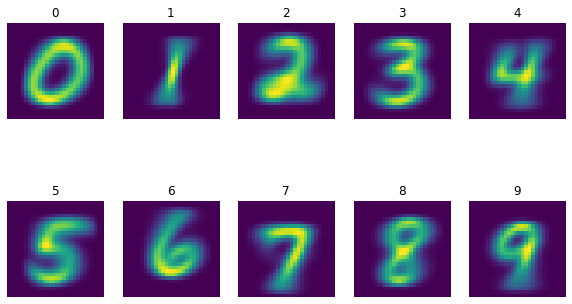

In [5]:
fig = plt.figure(figsize=(10, 6))
for it in range(10):
  plt.subplot(2, 5, it+1)
  plt.axis('off')
  plt.title(it)
  plt.imshow(separeted_classes_dictionary[it][0].mean(axis=0).squeeze())

In [6]:
num_classes = 10
input_shape = (28, 28, 1)

In [7]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

y_train shape: (60000, 10)


# drsmaia CNN

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [10]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='./cnn/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/cnn/'),
]

In [11]:
# Hyperparameters
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# model training
cnn_fit = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1, callbacks=callbacks)

Epoch 1/15
422/422 [==============================] - 43s 99ms/step - loss: 0.3691 - accuracy: 0.8886 - val_loss: 0.0789 - val_accuracy: 0.9793
Epoch 2/15
422/422 [==============================] - 43s 101ms/step - loss: 0.1080 - accuracy: 0.9674 - val_loss: 0.0553 - val_accuracy: 0.9845
Epoch 3/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0837 - accuracy: 0.9743 - val_loss: 0.0464 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0698 - accuracy: 0.9790 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0600 - accuracy: 0.9809 - val_loss: 0.0397 - val_accuracy: 0.9910
Epoch 6/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0344 - val_accuracy: 0.9915
Epoch 7/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0507 - accuracy: 0.9838 - val_loss: 0.0346 - val_accurac

# FeedFoward


In [13]:
feed_foward_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(8, activation="sigmoid"),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

feed_foward_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 28, 28, 16)        32        
                                                                 
 dense_2 (Dense)             (None, 28, 28, 8)         136       
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dropout_1 (Dropout)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                62730     
                                                                 
Total params: 62,898
Trainable params: 62,898
Non-trainable params: 0
_________________________________________________________________


In [14]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='./feed_foward/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/feed_foward/'),
]

In [15]:
# Hyperparameters
batch_size = 128
epochs = 15
feed_foward_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# model training
feed_foward_fit = feed_foward_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1, callbacks=callbacks)

Epoch 1/15
422/422 [==============================] - 15s 34ms/step - loss: 1.9301 - accuracy: 0.3501 - val_loss: 0.6618 - val_accuracy: 0.8717
Epoch 2/15
422/422 [==============================] - 15s 36ms/step - loss: 0.5678 - accuracy: 0.8315 - val_loss: 0.3181 - val_accuracy: 0.9122
Epoch 3/15
422/422 [==============================] - 14s 33ms/step - loss: 0.4203 - accuracy: 0.8763 - val_loss: 0.2767 - val_accuracy: 0.9215
Epoch 4/15
422/422 [==============================] - 14s 33ms/step - loss: 0.3858 - accuracy: 0.8872 - val_loss: 0.2650 - val_accuracy: 0.9237
Epoch 5/15
422/422 [==============================] - 14s 33ms/step - loss: 0.3635 - accuracy: 0.8950 - val_loss: 0.2510 - val_accuracy: 0.9272
Epoch 6/15
422/422 [==============================] - 14s 34ms/step - loss: 0.3538 - accuracy: 0.8968 - val_loss: 0.2439 - val_accuracy: 0.9322
Epoch 7/15
422/422 [==============================] - 14s 33ms/step - loss: 0.3457 - accuracy: 0.9019 - val_loss: 0.2499 - val_accuracy:

# Plots


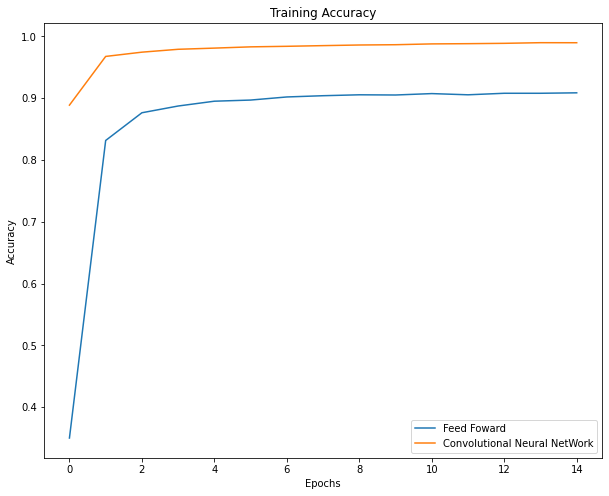

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(feed_foward_fit.history['accuracy'], label='Feed Foward')
ax = plt.plot(cnn_fit.history['accuracy'], label='Convolutional Neural NetWork')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Accuracy')
ax = plt.title('Training Accuracy')
ax = plt.legend()

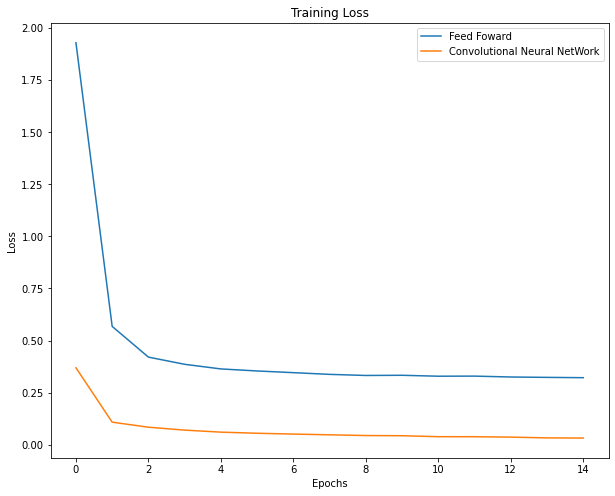

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(feed_foward_fit.history['loss'], label='Feed Foward')
ax = plt.plot(cnn_fit.history['loss'], label='Convolutional Neural NetWork')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Loss')
ax = plt.title('Training Loss')
ax = plt.legend()
